# 군집화(Clustering) - K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0.표준화, PCA
- 군집화는 일단표준화 이후 PCA로 2차원으로 만들어야 됨.

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

### 1.K-Means 모델 생성/ 학습

In [6]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [7]:
kmeans = KMeans(n_clusters=3, random_state = 2022)  # iris species 수
kmeans.fit(iris_std)
# 비지도 학습이라 y값이 필요가 없다.

KMeans(n_clusters=3, random_state=2022)

#### 학습결과는 labels에 나옴

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
np.unique(kmeans.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

#### Visualization

In [18]:
df = pd.DataFrame({
    'pc1':iris_pca[:, 0],'pc2':iris_pca[:,1], 'target' : iris.target,
    'cluster' : kmeans.labels_
})
df.tail()

,pc1,pc2,target,cluster
145,1.870503,0.386966,2,2
146,1.564580,-0.896687,2,0
147,1.521170,0.269069,2,2
148,1.372788,1.011254,2,2
149,0.960656,-0.024332,2,0


In [20]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['pc1']].count()

pc1
target cluster     
0      1         50
1      0         39
       2         11
2      0         14
       2         36

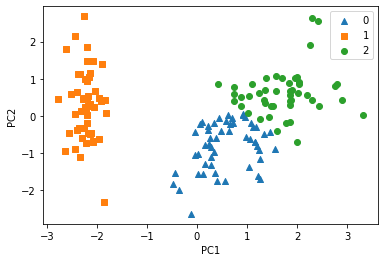

In [22]:
markers = ['^','s','o']
for i in range(3):
    gr_wine = df.groupby('cluster').get_group(i)
    plt.scatter(gr_wine.pc1,gr_wine.pc2, label = i, marker = markers[i])

plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title('Cluster')
plt.show()

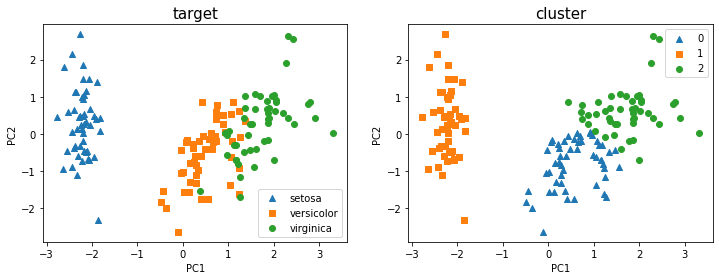

In [26]:
plt.figure(figsize = (12, 4))

for k , col in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k + 1)

    markers = ['^','s','o']
    for i in range(3):
        gr_wine = df.groupby(col).get_group(i)
        if k == 0 :
            plt.scatter(gr_wine.pc1,gr_wine.pc2, label = iris.target_names[i], marker = markers[i])
        else:
            plt.scatter(gr_wine.pc1,gr_wine.pc2, label = i, marker = markers[i])

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    plt.title(col, fontsize = 15)
plt.show()